#Project 1: Road Traffic Severity Classification
Description: This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 


task 2 - preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import data_cleaning_suggestions
from sklearn.preprocessing import LabelEncoder
import missingno as msno
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('RTA Dataset_cleaned.csv')

<AxesSubplot:>

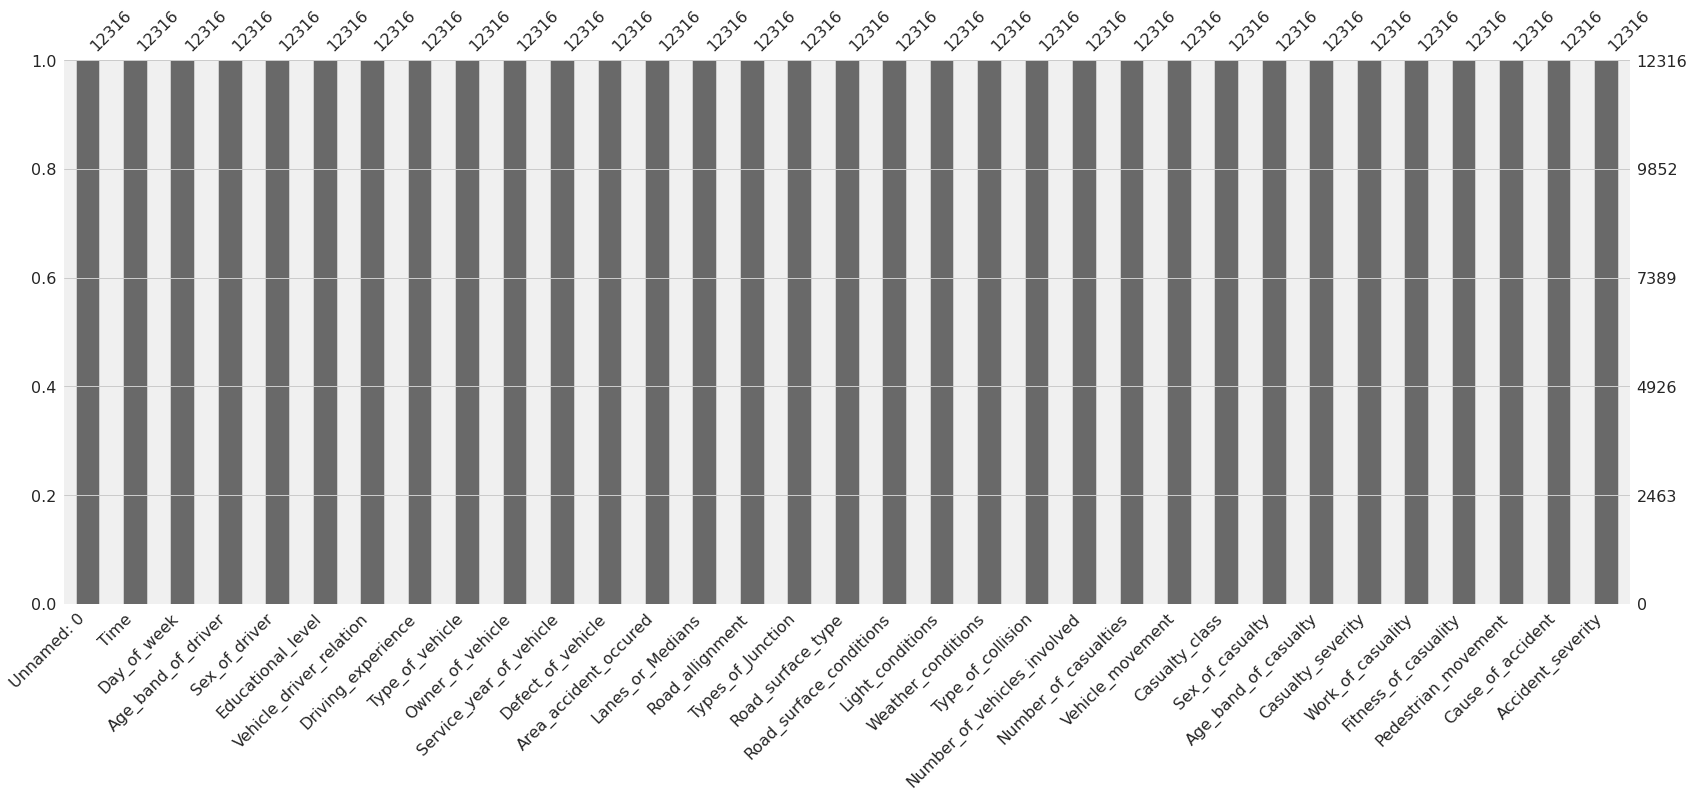

In [5]:
msno.bar(df)

In [6]:
lst_columns_labelEncoding = ['Day_of_week'
,'Driving_experience'
,'Educational_level'
,'Age_band_of_casualty'
,'Service_year_of_vehicle'
,'Age_band_of_driver'
,'Casualty_severity'
,'Accident_severity']

In [7]:
lst_columns_oneHotEncoding = ['Cause_of_accident'
,'Type_of_vehicle'
,'Area_accident_occured'
,'Vehicle_movement'
,'Road_allignment'
,'Type_of_collision'
,'Pedestrian_movement'
,'Weather_conditions'
,'Types_of_Junction'
,'Work_of_casuality'
,'Lanes_or_Medians'
,'Road_surface_type'
,'Fitness_of_casuality'
,'Owner_of_vehicle'
,'Road_surface_conditions'
,'Casualty_class'
,'Light_conditions'
,'Defect_of_vehicle'
,'Vehicle_driver_relation'
,'Sex_of_casualty'
,'Sex_of_driver']

2.2 Encoding techinques

In [8]:
# encode features using LabelEncoding

for feature in lst_columns_labelEncoding:
    print('Encoding feature : ',feature)
    featureEncoded = feature+'_encoded'
    df[featureEncoded] = LabelEncoder().fit_transform(df[feature])
    df.drop(feature, axis=1, inplace=True)
 

Encoding feature :  Day_of_week
Encoding feature :  Driving_experience
Encoding feature :  Educational_level
Encoding feature :  Age_band_of_casualty
Encoding feature :  Service_year_of_vehicle
Encoding feature :  Age_band_of_driver
Encoding feature :  Casualty_severity
Encoding feature :  Accident_severity


In [9]:
df

,Unnamed: 0,Time,Sex_of_driver,Vehicle_driver_relation,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Pedestrian_movement,Cause_of_accident,Day_of_week_encoded,Driving_experience_encoded,Educational_level_encoded,Age_band_of_casualty_encoded,Service_year_of_vehicle_encoded,Age_band_of_driver_encoded,Casualty_severity_encoded,Accident_severity_encoded
0,0,17:02:00,Male,Employee,Automobile,Owner,No defect,Residential areas,Unknown,Tangent road with flat terrain,...,Not a Pedestrian,Moving Backward,1,0,0,5,3,0,3,2
1,1,17:02:00,Male,Employee,Public (> 45 seats),Owner,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,...,Not a Pedestrian,Overtaking,1,3,4,5,2,1,3,2
2,2,17:02:00,Male,Employee,Lorry (41?100Q),Owner,No defect,Recreational areas,other,Unknown,...,Not a Pedestrian,Changing lane to the left,1,0,4,1,5,0,2,1
3,3,1:06:00,Male,Employee,Public (> 45 seats),Governmental,No defect,Office areas,other,Tangent road with mild grade and flat terrain,...,Not a Pedestrian,Changing lane to the right,3,2,4,0,5,0,2,2
4,4,1:06:00,Male,Employee,Unknown,Owner,No defect,Industrial areas,other,Tangent road with flat terrain,...,Not a Pedestrian,Overtaking,3,1,4,5,2,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12311,16:15:00,Male,Employee,Lorry (11?40Q),Owner,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,...,Not a Pedestrian,No distancing,6,1,5,5,5,1,3,2
12312,12312,18:00:00,Male,Employee,Automobile,Owner,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,...,Not a Pedestrian,No distancing,3,2,1,5,5,4,3,2
12313,12313,13:55:00,Male,Employee,Bajaj,Owner,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,...,Not a Pedestrian,Changing lane to the right,3,2,4,1,1,2,2,1
12314,12314,13:55:00,Female,Employee,Lorry (41?100Q),Owner,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,...,Not a Pedestrian,Driving under the influence of drugs,3,3,4,5,1,0,3,2


In [10]:
#encode features using OneHotEncoding/getdummies instead
for feature in lst_columns_oneHotEncoding:
    print('Encoding feature : ',feature)
    df = pd.get_dummies(df,prefix=feature, columns=[feature])
    #df.drop(feature, axis=1, inplace=True)

Encoding feature :  Cause_of_accident
Encoding feature :  Type_of_vehicle
Encoding feature :  Area_accident_occured
Encoding feature :  Vehicle_movement
Encoding feature :  Road_allignment
Encoding feature :  Type_of_collision
Encoding feature :  Pedestrian_movement
Encoding feature :  Weather_conditions
Encoding feature :  Types_of_Junction
Encoding feature :  Work_of_casuality
Encoding feature :  Lanes_or_Medians
Encoding feature :  Road_surface_type
Encoding feature :  Fitness_of_casuality
Encoding feature :  Owner_of_vehicle
Encoding feature :  Road_surface_conditions
Encoding feature :  Casualty_class
Encoding feature :  Light_conditions
Encoding feature :  Defect_of_vehicle
Encoding feature :  Vehicle_driver_relation
Encoding feature :  Sex_of_casualty
Encoding feature :  Sex_of_driver


In [11]:
df.head()

,Unnamed: 0,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_encoded,Driving_experience_encoded,Educational_level_encoded,Age_band_of_casualty_encoded,Service_year_of_vehicle_encoded,Age_band_of_driver_encoded,...,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown
0,0,17:02:00,2,2,1,0,0,5,3,0,...,1,0,0,0,0,0,1,0,1,0
1,1,17:02:00,2,2,1,3,4,5,2,1,...,1,0,0,0,0,0,1,0,1,0
2,2,17:02:00,2,2,1,0,4,1,5,0,...,1,0,0,0,0,1,0,0,1,0
3,3,1:06:00,2,2,3,2,4,0,5,0,...,1,0,0,0,1,0,0,0,1,0
4,4,1:06:00,2,2,3,1,4,5,2,0,...,1,0,0,0,0,0,1,0,1,0


In [12]:
#lets change the columns Time
def separaHoras(stringTime):
    lstTime = stringTime.split(':')
    return lstTime[0]

df['Time_hours'] = df['Time'].apply(separaHoras)

In [13]:
df.drop('Time',axis=1,inplace=True)

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Time_hours,24,object,0,0.000000,0.194868,76,
Number_of_casualties,8,int64,0,0.000000,0.064956,0,
Day_of_week_encoded,7,int64,0,0.000000,0.056837,0,
Driving_experience_encoded,7,int64,0,0.000000,0.056837,0,
Educational_level_encoded,7,int64,0,0.000000,0.056837,0,
Service_year_of_vehicle_encoded,6,int64,0,0.000000,0.048717,0,
Number_of_vehicles_involved,6,int64,0,0.000000,0.048717,0,
Age_band_of_casualty_encoded,6,int64,0,0.000000,0.048717,0,
Age_band_of_driver_encoded,5,int64,0,0.000000,0.040598,0,
Casualty_severity_encoded,4,int64,0,0.000000,0.032478,0,


2.3 Imbalanced data tratment

In [16]:
lstFeatures = df.columns.tolist()

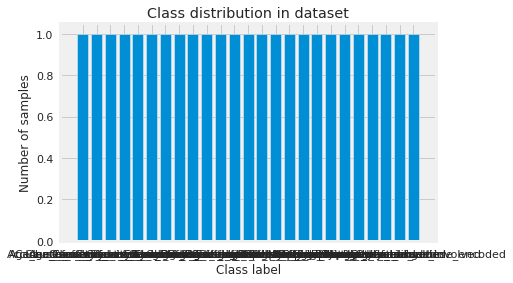

In [17]:

unique_labels, counts = np.unique(lstFeatures[0:25], return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

At first glance it seems to be pretty much balanced, after the encoding of course,

Is target variable skewed?

In [18]:
from scipy.stats import shapiro

In [19]:
shapiro(df['Accident_severity_encoded'])

ShapiroResult(statistic=0.44445037841796875, pvalue=0.0)

In [20]:
num_features=df.dtypes[df.dtypes!='object'].index
skew_feats = df[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})

In [67]:
skewness

,Skew
Area_accident_occured_Recreational areas,110.977475
Road_surface_conditions_Flood over 3cm. deep,78.463366
"Pedestrian_movement_Walking along in carriageway, facing traffic",41.914879
Type_of_collision_With Train,36.956432
Vehicle_movement_Parked,35.055672
...,...
Accident_severity_encoded,-2.341867
Road_surface_type_Asphalt roads,-3.027712
Pedestrian_movement_Not a Pedestrian,-3.222428
Sex_of_driver_Male,-3.330305


<AxesSubplot:xlabel='Accident_severity_encoded', ylabel='Density'>

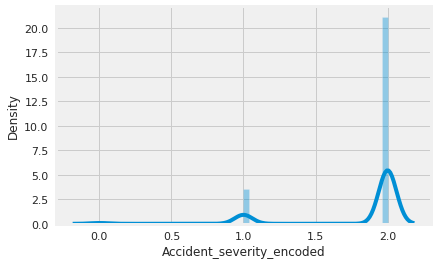

In [21]:
sns.distplot(df['Accident_severity_encoded'])

In [22]:
df['Accident_severity_encoded'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity_encoded, dtype: int64

In [25]:
df.to_csv('RTA Dataset_encoded.csv')

In [23]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (12316, 179)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  11
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  167
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    179 Predictors classified...
        1 variables removed since they were ID or low-information variables
11 numeric variables in data exceeds limit, taking top 177 variables
Number of All Scatter Plots = 

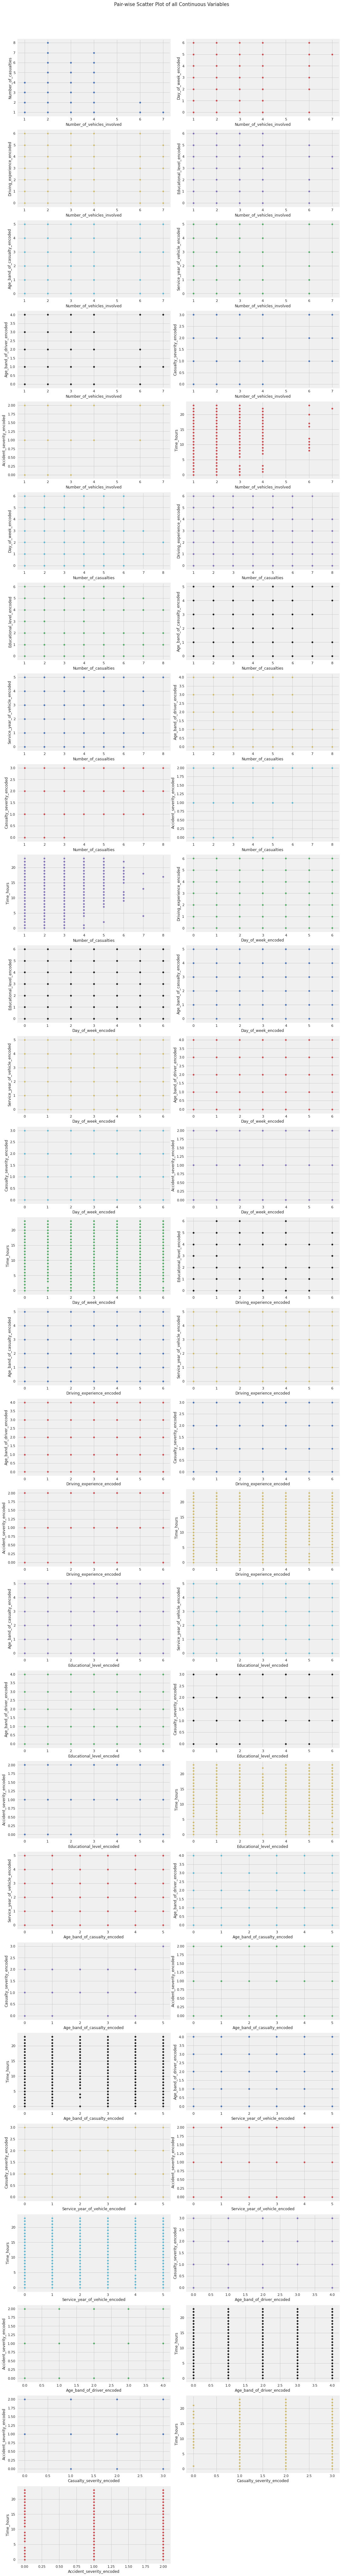

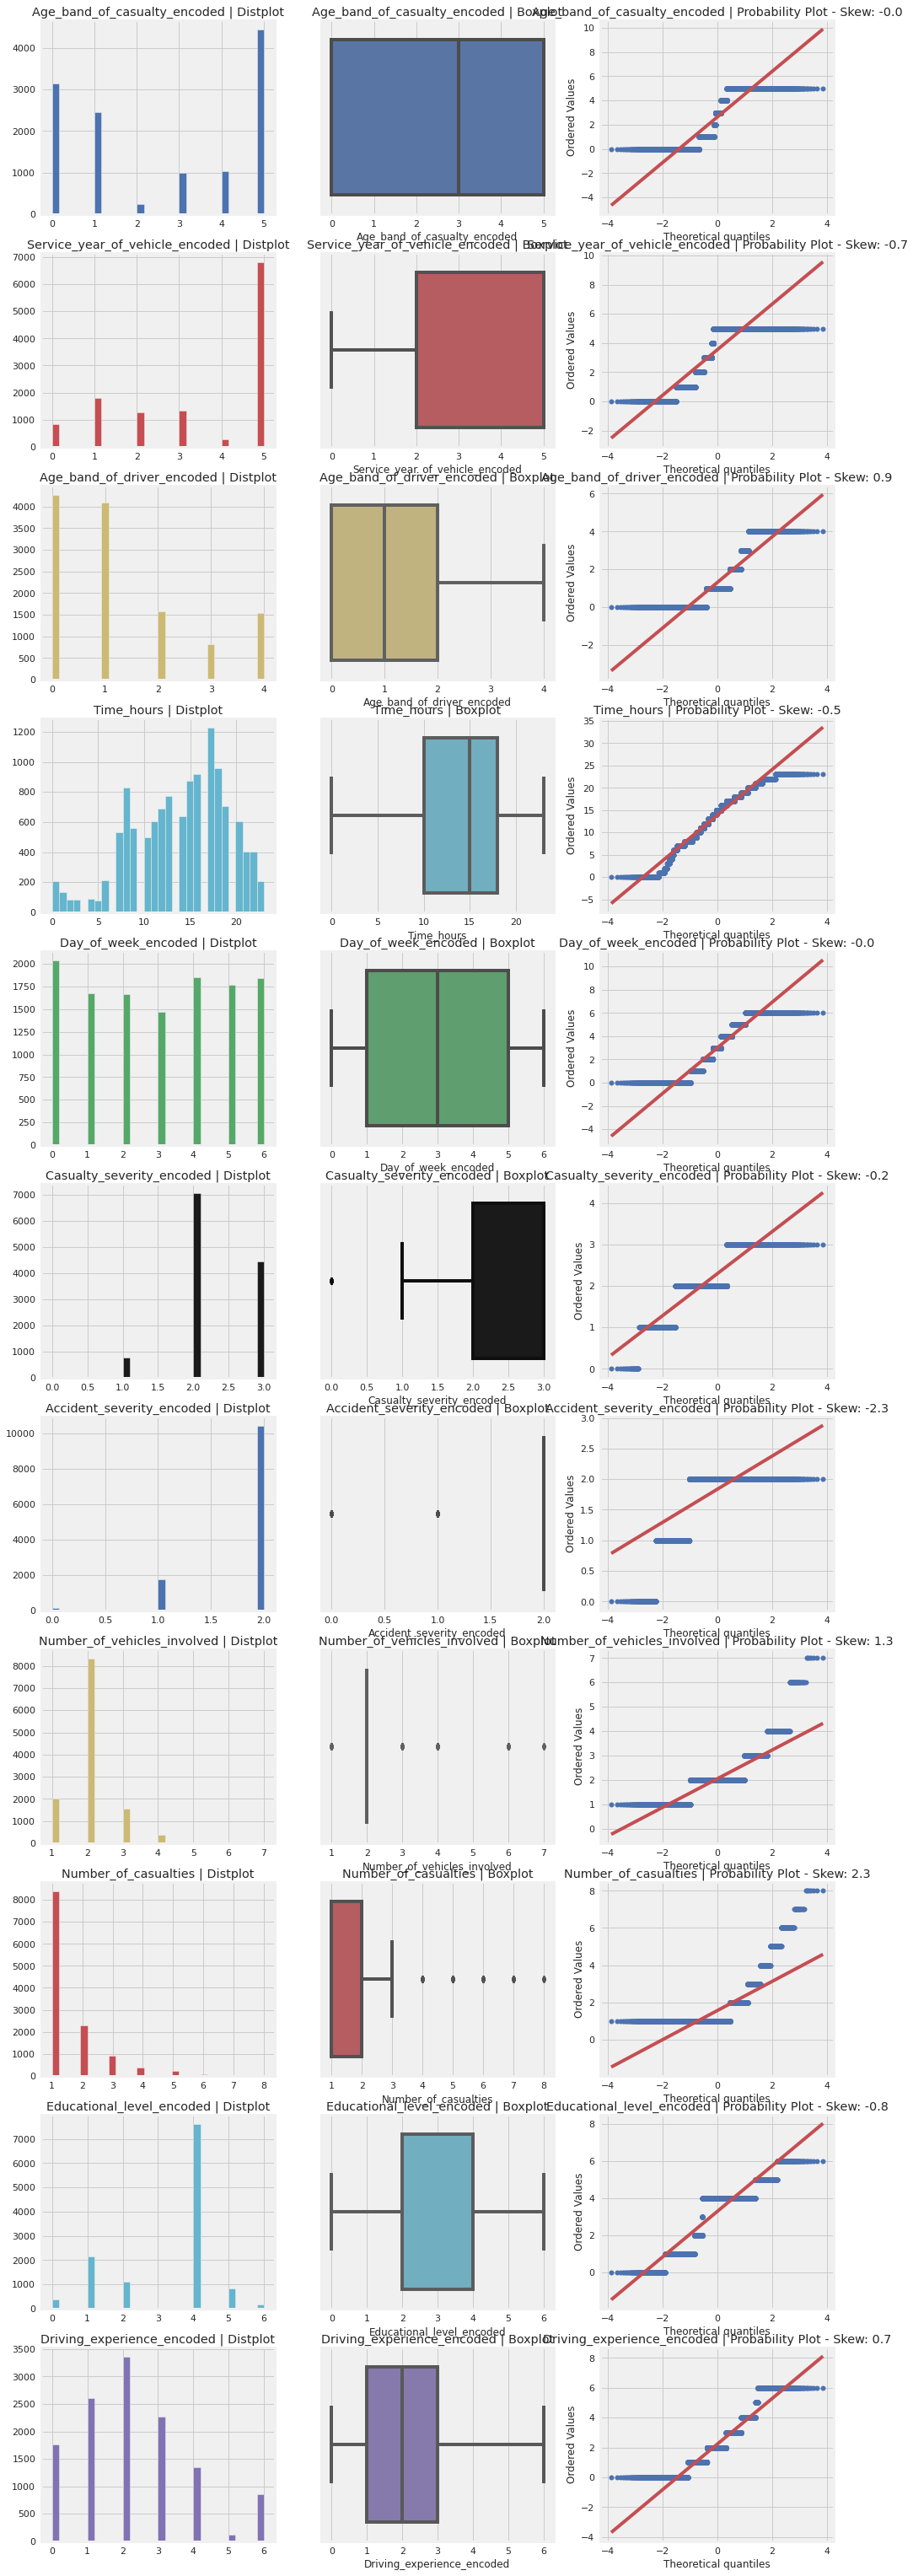

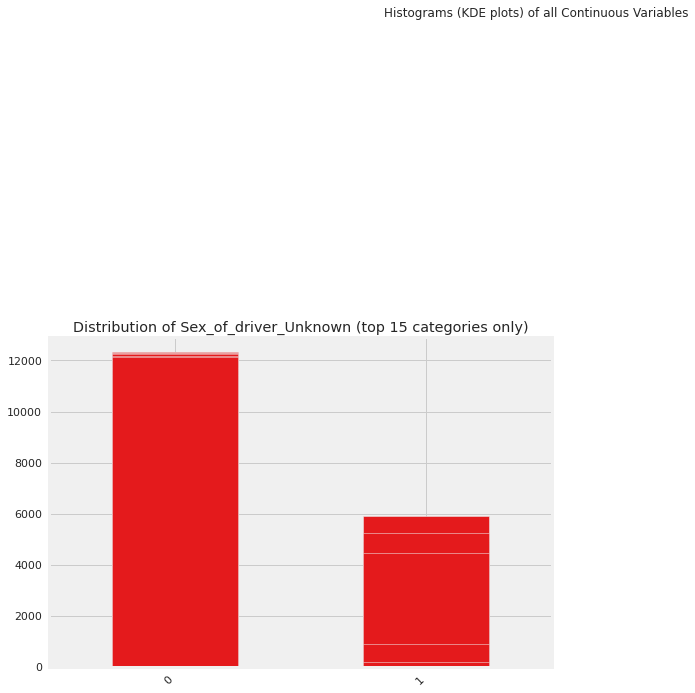

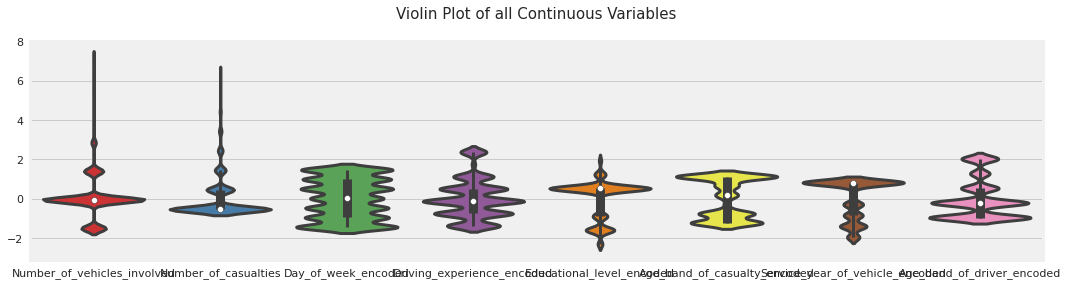

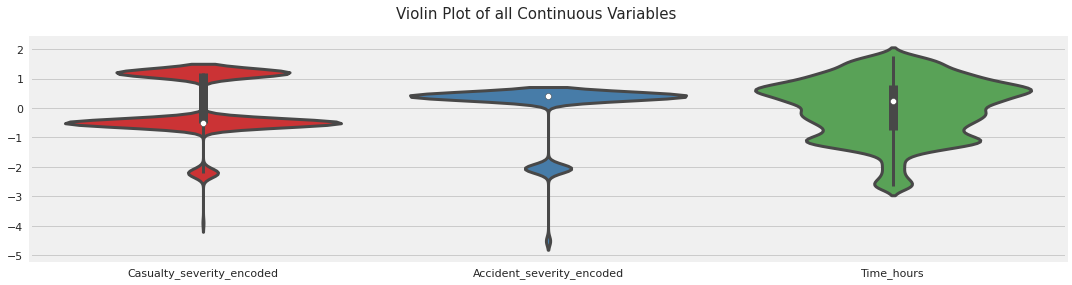

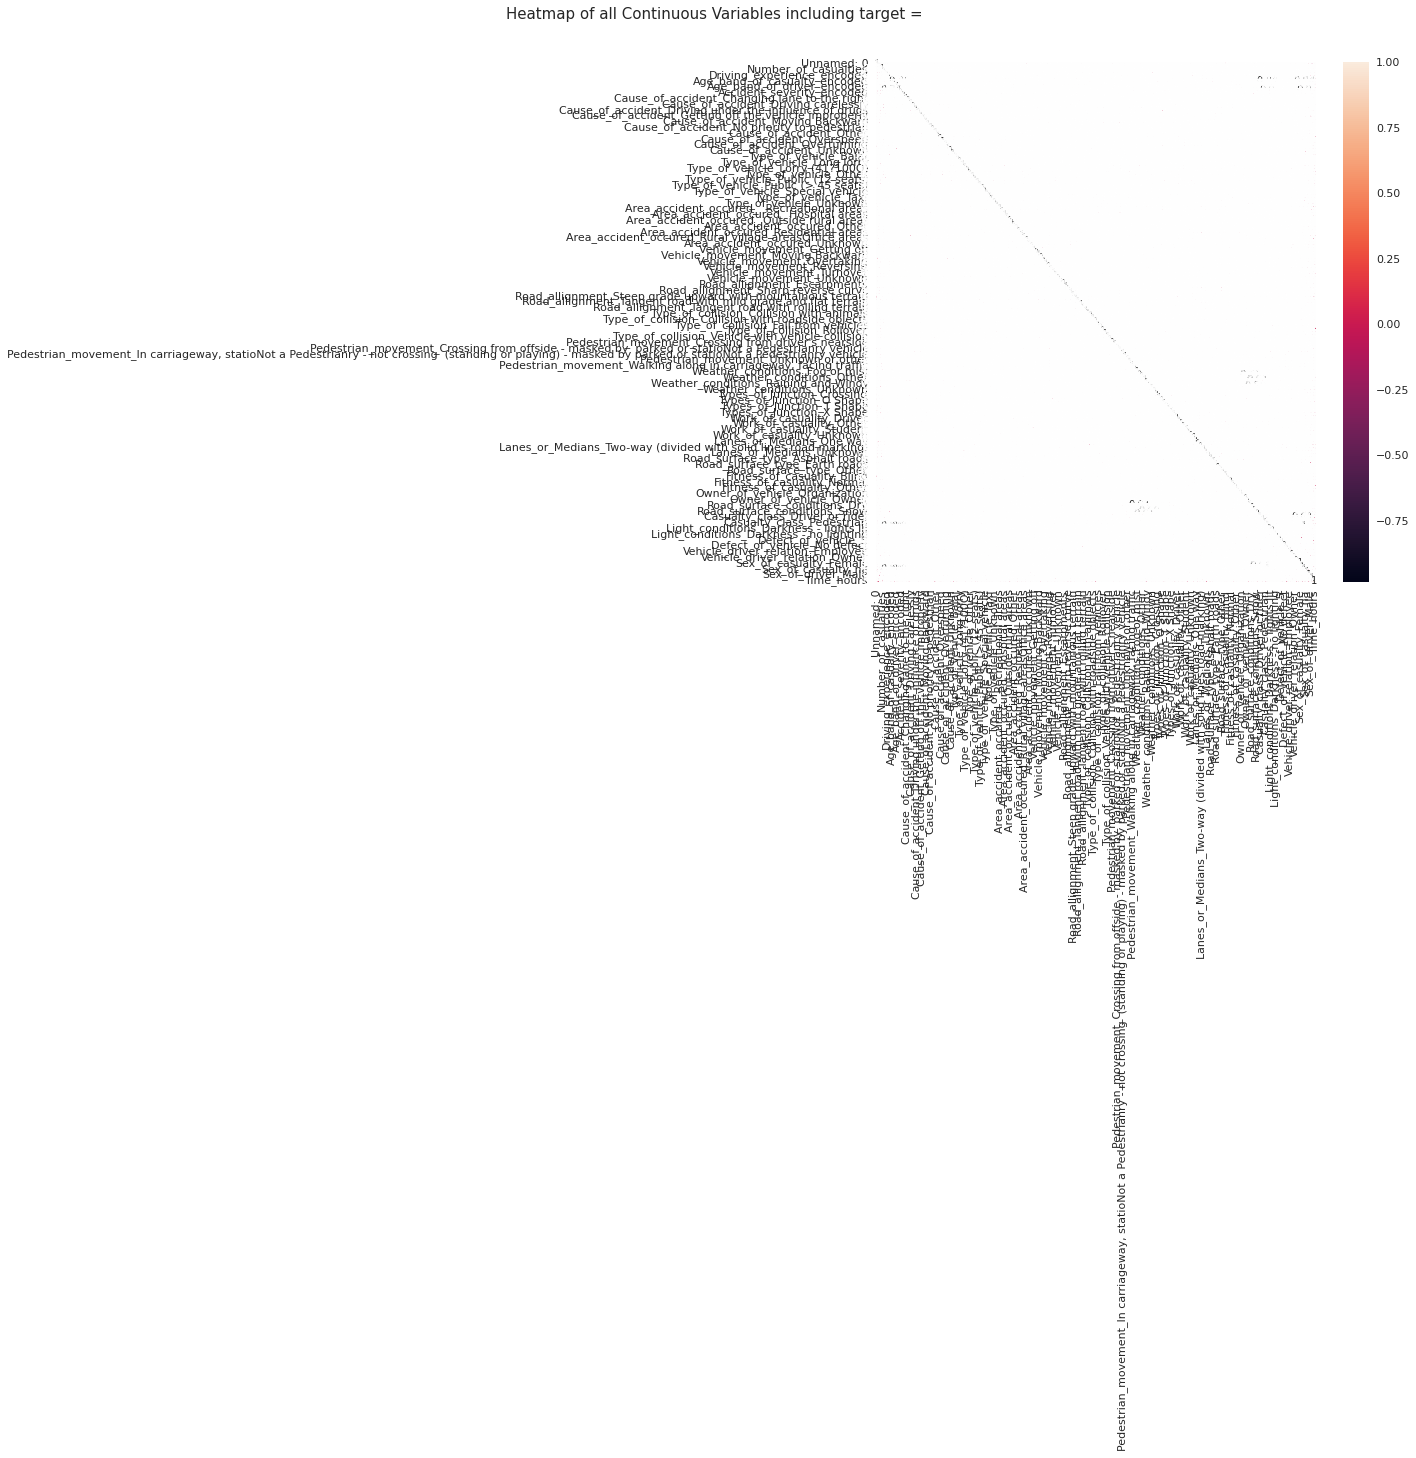

ValueError: Image size of 1440x330840 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x330840 with 1837 Axes>

All Plots done
Time to run AutoViz = 725 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_encoded,Driving_experience_encoded,Educational_level_encoded,Age_band_of_casualty_encoded,Service_year_of_vehicle_encoded,Age_band_of_driver_encoded,Casualty_severity_encoded,...,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Time_hours
0,0,2,2,1,0,0,5,3,0,3,...,0,0,0,0,0,1,0,1,0,17
1,1,2,2,1,3,4,5,2,1,3,...,0,0,0,0,0,1,0,1,0,17
2,2,2,2,1,0,4,1,5,0,2,...,0,0,0,0,1,0,0,1,0,17
3,3,2,2,3,2,4,0,5,0,2,...,0,0,0,1,0,0,0,1,0,1
4,4,2,2,3,1,4,5,2,0,3,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12311,2,1,6,1,5,5,5,1,3,...,0,0,0,0,0,1,0,1,0,16
12312,12312,2,1,3,2,1,5,5,4,3,...,0,0,0,0,0,1,0,1,0,18
12313,12313,1,1,3,2,4,1,1,2,2,...,0,0,0,0,1,0,0,1,0,13
12314,12314,2,1,3,3,4,5,1,0,3,...,0,0,0,0,0,1,1,0,0,13


In [26]:

AV.AutoViz('RTA Dataset_encoded.csv', sep=',', depVar='', dfte=df, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=15000,max_cols_analyzed=177)